In [1]:
import pandas as pd

In [3]:
dataset=pd.read_csv(r"E:\tops\Data science\ML Model\Crop Prediction\Crop_recommendation.csv")
dataset.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [4]:
x=dataset["label"].unique()

In [5]:
x

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
dataset.shape


(2200, 8)

In [8]:
encoder = OneHotEncoder(sparse_output=False)


In [9]:
onehot = encoder.fit_transform(dataset[["label"]])


In [10]:
encoded_cols = encoder.get_feature_names_out(["label"])


In [23]:
encoded_cols

array(['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean',
       'label_muskmelon', 'label_orange', 'label_papaya',
       'label_pigeonpeas', 'label_pomegranate', 'label_rice',
       'label_watermelon'], dtype=object)

In [11]:
onehot_df = pd.DataFrame(onehot, columns=encoded_cols, index=dataset.index)


In [12]:
dataset = pd.concat([dataset, onehot_df], axis=1)


In [14]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label,label_apple,label_banana,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataset.isnull().sum()

N                    0
P                    0
K                    0
temperature          0
humidity             0
ph                   0
rainfall             0
label                0
label_apple          0
label_banana         0
label_blackgram      0
label_chickpea       0
label_coconut        0
label_coffee         0
label_cotton         0
label_grapes         0
label_jute           0
label_kidneybeans    0
label_lentil         0
label_maize          0
label_mango          0
label_mothbeans      0
label_mungbean       0
label_muskmelon      0
label_orange         0
label_papaya         0
label_pigeonpeas     0
label_pomegranate    0
label_rice           0
label_watermelon     0
dtype: int64

In [16]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
       'label_rice', 'label_watermelon'],
      dtype='object')

In [17]:
dataset.drop('label',axis=1)

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split

In [24]:
x=dataset[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y=dataset[['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean',
       'label_muskmelon', 'label_orange', 'label_papaya',
       'label_pigeonpeas', 'label_pomegranate', 'label_rice',
       'label_watermelon']]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape

(1760, 7)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,...,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,0.045455,0.045455,0.045455,...,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,0.208346,0.208346,0.208346,...,0.208346,0.208346,0.208346,0.208346,0.208346,0.208346,0.208346,0.208346,0.208346,0.208346
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


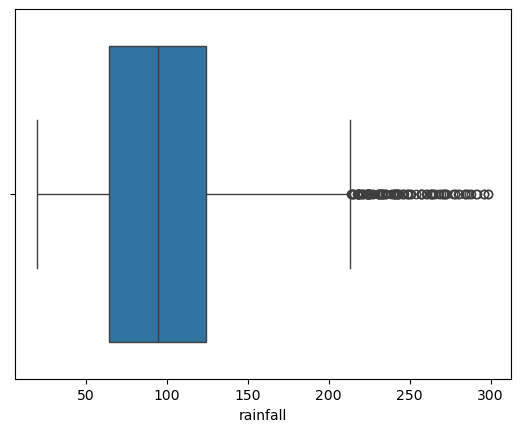

In [46]:
sns.boxplot(x="rainfall" ,data=dataset)
plt.show()

C:\Users\thako\AppData\Local\Temp\ipykernel_15488\3628348646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['rainfall'])


<Axes: xlabel='rainfall', ylabel='Density'>

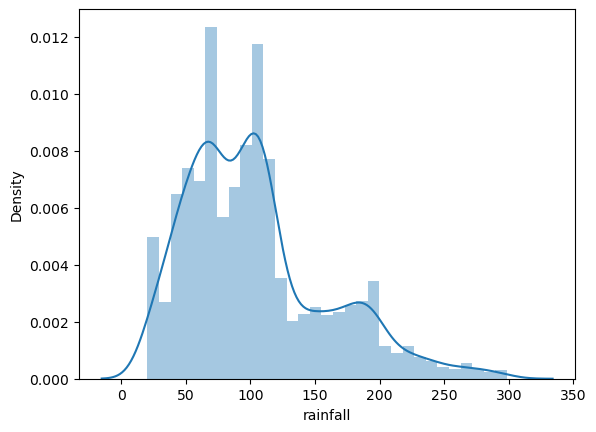

In [47]:
sns.distplot(dataset['rainfall'])